### Import the libraries

In [238]:
import pandas as pd
import numpy as np
import sklearn
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Load the datasets

In [2]:
kenya_customers = pd.read_csv('Kenya Customers.csv')
kenya_deliveries = pd.read_csv('Kenya Deliveries.csv')
kenya_orders  = pd.read_csv('Kenya Orders.csv')

nigeria_customers = pd.read_csv('Nigeria Customers.csv')
nigeria_deliveries = pd.read_csv('Nigeria Deliveries.csv')
nigeria_orders  = pd.read_csv('Nigeria Orders.csv')

### Gain insights on the Kenyan datasets

In [3]:
kenya_customers.head()

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location
0,3144837,WEB,0,2021-03-15T17:13:19.000Z,en,0,0,NaN,NaN
1,3174590,WEB,0,2021-03-20T14:15:11.000Z,en,0,0,NaN,NaN
2,3181998,WEB,0,2021-03-21T15:36:51.000Z,en,0,0,NaN,NaN
3,3191244,WEB,0,2021-03-23T08:54:00.000Z,en,0,367,NaN,NaN
4,3274222,WEB,0,2021-04-06T13:52:39.000Z,en,0,0,NaN,NaN


In [4]:
kenya_customers.shape

(4177, 9)

In [6]:
kenya_customers.isnull().sum()

Customer ID                      0
Last Used Platform               0
Is Blocked                       0
Created At                       0
Language                         0
Outstanding Amount               0
Loyalty Points                   0
Number of employees           1038
Upload restuarant location    4158
dtype: int64

In [7]:
kenya_deliveries.head()

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),...,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34,Unnamed: 35
0,368110390,"YR-11265216,0",3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,...,-,-,-,-,-,-,-,-,NaN,NaN
1,368110390,"YR-11265216,0",3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,...,KSh 0.00,KSh 0.00,KSh 0.00,4700,CASH,-,-,-,NaN,NaN
2,368109621,"YR-11265175,0",3.681096e+29,Default Team,Delivery,NaN,-,-,-,-,...,KSh 0.00,KSh 0.00,KSh 400.00,19500,CASH,-,-,-,NaN,NaN
3,368105817,"YR-11265015,0",3.681058e+29,Default Team,Delivery,NaN,-,-,-,-,...,KSh 0.00,KSh 0.00,KSh 50.00,4350,CASH,-,-,-,NaN,NaN
4,368098308,"YR-11264651,0",3.680983e+29,Default Team,Delivery,Urgently deliver by 9.30am in the morning,-,-,-,-,...,-,-,-,-,-,-,-,-,NaN,NaN


In [11]:
kenya_deliveries = kenya_deliveries[kenya_deliveries.columns].replace('-', np.nan)

In [12]:
kenya_deliveries.shape

(44983, 36)

In [13]:
kenya_deliveries.isnull().sum()

Task_ID                      0
Order_ID                     1
Relationship                 0
Team_Name                    0
Task_Type                    0
Notes                    31111
Agent_ID                  2736
Agent_Name                2738
Distance(m)               6985
Total_Time_Taken(min)      145
Pick_up_From                 0
Start_Before                 0
Complete_Before              1
Completion_Time            138
Task_Status                  0
Ref_Images               44874
Rating                     109
Review                   44816
Latitude                   109
Longitude                    0
Tags                     44874
Promo_Applied            44983
Custom_Template_ID         109
Task_Details_QTY             1
Task_Details_AMOUNT          1
Special_Instructions     39030
Tip                      24377
Delivery_Charges         24377
Discount                 24377
Subtotal                 24377
Payment_Type             24379
Task_Category            44944
Earning 

In [15]:
kenya_orders.head()

,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,...,Commission Amount,Commission Payout Status,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value
0,11265015,ORDERED,Cooking Fat & Oil,KKCO0487,NaN,NaN,1,4400,4250,4250,...,NaN,NaN,0,-,50,-,NaN,0,-,-
1,11264651,ORDERED,Cleaning & Hygiene,KKPT280100,NaN,NaN,1,180,130,130,...,NaN,NaN,0,-,-,-,NaN,0,-,-
2,11264651,ORDERED,Flour & Sugar,KKFS0702,NaN,NaN,6,263,247,1482,...,NaN,NaN,0,-,-,-,NaN,0,-,-
3,11264651,ORDERED,Salt & Seasoning,KKSS0002,NaN,NaN,10,65,58,580,...,NaN,NaN,0,-,-,-,NaN,0,-,-
4,11264651,ORDERED,Beverages,KKBE0105,NaN,NaN,1,249,208.5,208.5,...,NaN,NaN,0,-,-,-,NaN,0,-,-


In [16]:
kenya_orders = kenya_orders[kenya_orders.columns].replace('-', np.nan)

In [17]:
kenya_orders.shape

(12242, 47)

In [19]:
kenya_orders.isnull().sum()

Order ID                        0
Order Status                    0
Category Name                   6
SKU                             3
Customization Group         12242
Customization Option        12242
Quantity                        0
Unit Price                      0
Cost Price                      6
Total Cost Price                6
Total Price                     0
Order Total                     0
Sub Total                       0
Tax                         12242
Delivery Charge             12242
Tip                         12242
Discount                    12242
Remaining Balance               0
Payment Method                  0
Additional Charge           12242
Taxable Amount              12242
Transaction ID                  0
Currency Symbol                 0
Transaction Status          12242
Promo Code                  12242
Customer ID                     0
Merchant ID                     0
Store Name                      0
Pickup Address                  0
Description   

### Dropping all the columns with more than 80% missing data

In [26]:
#Kenya Customers

In [22]:
kenya_customers[kenya_customers.columns[kenya_customers.isnull().mean() > 0.8]].columns

Index(['Upload restuarant location'], dtype='object')

In [23]:
kenya_customers.drop(['Upload restuarant location'],axis=1,inplace=True)

In [24]:
kenya_customers.columns

Index(['Customer ID', 'Last Used Platform', 'Is Blocked', 'Created At',
       'Language', 'Outstanding Amount', 'Loyalty Points',
       'Number of employees'],
      dtype='object')

In [25]:
kenya_customers.shape

(4177, 8)

In [27]:
#Kenya deliveries

In [28]:
kenya_deliveries[kenya_deliveries.columns[kenya_deliveries.isnull().mean() > 0.8]].columns

Index(['Ref_Images', 'Review', 'Tags', 'Promo_Applied', 'Special_Instructions',
       'Task_Category', 'Unnamed: 34', 'Unnamed: 35'],
      dtype='object')

In [34]:
limit = len(kenya_deliveries) * .80
kenya_deliveries = kenya_deliveries.dropna(thresh=limit, axis=1)

In [35]:
kenya_deliveries.columns

Index(['Task_ID', 'Order_ID', 'Relationship', 'Team_Name', 'Task_Type',
       'Agent_ID', 'Agent_Name', 'Distance(m)', 'Total_Time_Taken(min)',
       'Pick_up_From', 'Start_Before', 'Complete_Before', 'Completion_Time',
       'Task_Status', 'Rating', 'Latitude', 'Longitude', 'Custom_Template_ID',
       'Task_Details_QTY', 'Task_Details_AMOUNT'],
      dtype='object')

In [37]:
kenya_deliveries.shape

(44983, 20)

In [38]:
#Kenya Orders

In [39]:
kenya_orders[kenya_orders.columns[kenya_orders.isnull().mean() > 0.8]].columns

Index(['Customization Group', 'Customization Option', 'Tax', 'Delivery Charge',
       'Tip', 'Discount', 'Additional Charge', 'Taxable Amount',
       'Transaction Status', 'Promo Code', 'Ratings', 'Reviews',
       'Merchant Earning', 'Commission Amount', 'Commission Payout Status',
       'Debt Amount', 'Cancellation Reason', 'Checkout Template Name',
       'Checkout Template Value'],
      dtype='object')

In [40]:
kenya_orders.shape

(12242, 47)

In [41]:
limit = len(kenya_orders) * .80
kenya_orders = kenya_orders.dropna(thresh=limit, axis=1)

In [42]:
kenya_orders.shape

(12242, 26)

In [ ]:
#kenya_customers

In [101]:
kenya_customers = kenya_customers.ffill().bfill()

In [102]:
kenya_customers.isnull().sum()

Customer ID            0
Last Used Platform     0
Is Blocked             0
Created At             0
Language               0
Outstanding Amount     0
Loyalty Points         0
Number of employees    0
dtype: int64

In [ ]:
#kenya_deliveries

In [103]:
kenya_deliveries = kenya_deliveries.ffill().bfill()

In [104]:
kenya_deliveries.isnull().sum()

Task_ID                  0
Order_ID                 0
Relationship             0
Team_Name                0
Task_Type                0
Agent_ID                 0
Agent_Name               0
Distance(m)              0
Total_Time_Taken(min)    0
Pick_up_From             0
Start_Before             0
Complete_Before          0
Completion_Time          0
Task_Status              0
Rating                   0
Latitude                 0
Longitude                0
Custom_Template_ID       0
Task_Details_QTY         0
Task_Details_AMOUNT      0
dtype: int64

In [ ]:
#kenya_orders

In [105]:
kenya_orders = kenya_orders.ffill().bfill()

In [106]:
kenya_orders.isnull().sum()

Order ID                   0
Order Status               0
Category Name              0
SKU                        0
Quantity                   0
Unit Price                 0
Cost Price                 0
Total Cost Price           0
Total Price                0
Order Total                0
Sub Total                  0
Remaining Balance          0
Payment Method             0
Transaction ID             0
Currency Symbol            0
Customer ID                0
Merchant ID                0
Store Name                 0
Pickup Address             0
Distance (in km)           0
Order Time                 0
Pickup Time                0
Delivery Time              0
Order Preparation Time     0
Consumed Loyalty Points    0
Flat Discount              0
dtype: int64

In [44]:
data = pd.concat([kenya_customers,kenya_orders,kenya_deliveries], axis=0, ignore_index=True)

In [45]:
data.shape

(61402, 53)

In [48]:
data.isnull().sum()

Customer ID                44983
Last Used Platform         57225
Is Blocked                 57225
Created At                 57225
Language                   57225
Outstanding Amount         57225
Loyalty Points             57225
Number of employees        58263
Order ID                   49160
Order Status               49160
Category Name              49166
SKU                        49163
Quantity                   49160
Unit Price                 49160
Cost Price                 49166
Total Cost Price           49166
Total Price                49160
Order Total                49160
Sub Total                  49160
Remaining Balance          49160
Payment Method             49160
Transaction ID             49160
Currency Symbol            49160
Merchant ID                49160
Store Name                 49160
Pickup Address             49160
Distance (in km)           49160
Order Time                 49160
Pickup Time                49160
Delivery Time              49160
Order Prep

In [97]:
#Nigeria Datasets

In [50]:
nigeria_customers.head()

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees
0,3922702,WEB,0,2021-07-12T08:06:47.000Z,en,0,0,NaN
1,4058001,WEB,0,2021-08-05T08:22:35.000Z,en,0,0,NaN
2,4058334,WEB,0,2021-08-05T09:38:09.000Z,en,0,0,NaN
3,4058414,WEB,0,2021-08-05T09:56:57.000Z,en,0,0,NaN
4,4058431,WEB,0,2021-08-05T09:59:51.000Z,en,0,0,NaN


In [52]:
nigeria_customers.shape

(1095, 8)

In [53]:
nigeria_customers.isnull().sum()

Customer ID              0
Last Used Platform       0
Is Blocked               0
Created At               0
Language                 0
Outstanding Amount       0
Loyalty Points           0
Number of Employees    490
dtype: int64

In [55]:
nigeria_deliveries.head()

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,...,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing
0,368032956,"YR-11262518,0",3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,...,₦ 104250.00,-,-,-,-,-,-,-,-,-
1,368032956,"YR-11262518,0",3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,...,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-
2,368012178,"YR-11261796,0",3.680122e+29,Default Team,Delivery,NaN,1166840,11,-,Topup Mama,...,₦ 104250.00,-,-,-,-,-,-,-,-,-
3,368012178,"YR-11261796,0",3.680122e+29,Default Team,Delivery,NaN,1166840,11,-,Topup Mama,...,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-
4,367999205,"YR-11261341,0",3.679992e+29,Default Team,Delivery,NaN,1233220,-,-,Topup Mama,...,₦ 1950.00,-,-,-,-,-,-,-,-,-


In [56]:
nigeria_deliveries = nigeria_deliveries[nigeria_deliveries.columns].replace('-', np.nan)

In [58]:
nigeria_deliveries.shape

(8019, 33)

In [59]:
nigeria_deliveries.isnull().sum()

Task_ID                     0
Order_ID                    0
Relationship                0
Team_Name                   0
Task_Type                   0
Notes                    8012
Agent_ID                  721
Distance(m)              2706
Total_Time_Taken(min)      90
Pick_up_From                0
Start_Before                0
Complete_Before             0
Completion_Time            90
Task_Status                 0
Ref_Images               8019
Rating                      0
Review                   8007
Latitude                    0
Longitude                   0
Tags                     8019
Promo_Applied            8019
Custom_Template_ID          0
Task_Details_QTY            1
Task_Details_AMOUNT         0
Special_Instructions     8011
Tip                      2596
Delivery_Charges         2596
Discount                 2594
Subtotal                 2594
Payment_Type             2594
Task_Category            8019
Earning                  8019
Pricing                  8019
dtype: int

In [60]:
nigeria_deliveries[nigeria_deliveries.columns[nigeria_deliveries.isnull().mean() > 0.8]].columns

Index(['Notes', 'Ref_Images', 'Review', 'Tags', 'Promo_Applied',
       'Special_Instructions', 'Task_Category', 'Earning', 'Pricing'],
      dtype='object')

In [61]:
threshold = len(nigeria_deliveries) * .80
nigeria_deliveries = nigeria_deliveries.dropna(thresh=threshold, axis=1)

In [62]:
nigeria_deliveries.columns

Index(['Task_ID', 'Order_ID', 'Relationship', 'Team_Name', 'Task_Type',
       'Agent_ID', 'Total_Time_Taken(min)', 'Pick_up_From', 'Start_Before',
       'Complete_Before', 'Completion_Time', 'Task_Status', 'Rating',
       'Latitude', 'Longitude', 'Custom_Template_ID', 'Task_Details_QTY',
       'Task_Details_AMOUNT'],
      dtype='object')

In [63]:
nigeria_deliveries.shape

(8019, 18)

In [64]:
# Nigeria Orders

In [65]:
nigeria_orders.head()

,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,...,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value
0,11262518,ORDERED,Flour & Sugar,KNFS0001,NaN,NaN,5,20850,20370,101850,...,NaN,NaN,NaN,0,-,-,NaN,0,-,-
1,11262518,ORDERED,Spreads,KNSP2001,NaN,NaN,1,325,300,300,...,NaN,NaN,NaN,0,-,-,NaN,0,-,-
2,11261796,DISPATCHED,Flour & Sugar,KNFS0001,NaN,NaN,5,20850,20370,101850,...,NaN,NaN,NaN,0,-,-,NaN,0,-,-
3,11261796,DISPATCHED,Spreads,KNSP2001,NaN,NaN,1,325,300,300,...,NaN,NaN,NaN,0,-,-,NaN,0,-,-
4,11261341,ORDERED,Spreads,KNSP2001,NaN,NaN,6,325,300,1800,...,NaN,NaN,NaN,0,-,-,NaN,0,-,-


In [66]:
nigeria_orders = nigeria_orders[nigeria_orders.columns].replace('-', np.nan)

In [69]:
nigeria_orders.shape

(1429, 46)

In [71]:
nigeria_orders.isnull().sum()

Order ID                       0
Order Status                   0
Category Name                  0
SKU                            0
Customization Group         1429
Customization Option        1429
Quantity                       0
Unit Price                     0
Cost Price                     0
Total Cost Price               0
Total Price                    0
Order Total                    0
Sub Total                      0
Tax                         1429
Delivery Charge             1429
Tip                         1429
Discount                    1429
Remaining Balance              0
Payment Method                 0
Additional Charge           1429
Taxable Amount              1429
Transaction ID                 0
Currency Symbol                0
Transaction Status          1429
Promo Code                  1429
Customer ID                    0
Merchant ID                    0
Store Name                     0
Pickup Address              1429
Description                 1429
Distance (

In [72]:
nigeria_orders[nigeria_orders.columns[nigeria_orders.isnull().mean() > 0.8]].columns

Index(['Customization Group', 'Customization Option', 'Tax', 'Delivery Charge',
       'Tip', 'Discount', 'Additional Charge', 'Taxable Amount',
       'Transaction Status', 'Promo Code', 'Pickup Address', 'Description',
       'Ratings', 'Reviews', 'Merchant Earning', 'Commission Amount',
       'Commission Payout Status', 'Cancellation Reason',
       'Checkout Template Name', 'Checkout Template Value'],
      dtype='object')

In [73]:
threshold = len(nigeria_orders) * .80
nigeria_orders = nigeria_orders.dropna(thresh=threshold, axis=1)

In [75]:
nigeria_orders.shape

(1429, 24)

### Fill in missing values for Nigerian datasets

In [ ]:
#nigeria_customers

In [108]:
nigeria_customers = nigeria_customers.ffill().bfill()

In [109]:
nigeria_customers.isnull().sum()

Customer ID            0
Last Used Platform     0
Is Blocked             0
Created At             0
Language               0
Outstanding Amount     0
Loyalty Points         0
Number of Employees    0
dtype: int64

In [ ]:
#nigeria_deliveries

In [110]:
nigeria_deliveries = nigeria_deliveries.ffill().bfill()

In [111]:
nigeria_deliveries.isnull().sum()

Task_ID                  0
Order_ID                 0
Relationship             0
Team_Name                0
Task_Type                0
Agent_ID                 0
Total_Time_Taken(min)    0
Pick_up_From             0
Start_Before             0
Complete_Before          0
Completion_Time          0
Task_Status              0
Rating                   0
Latitude                 0
Longitude                0
Custom_Template_ID       0
Task_Details_QTY         0
Task_Details_AMOUNT      0
dtype: int64

In [ ]:
#nigeria_orders

In [112]:
nigeria_orders = nigeria_orders.ffill().bfill()

In [113]:
nigeria_orders.isnull().sum()

Order ID                  0
Order Status              0
Category Name             0
SKU                       0
Quantity                  0
Unit Price                0
Cost Price                0
Total Cost Price          0
Total Price               0
Order Total               0
Sub Total                 0
Remaining Balance         0
Payment Method            0
Transaction ID            0
Currency Symbol           0
Customer ID               0
Merchant ID               0
Store Name                0
Distance (in km)          0
Order Time                0
Pickup Time               0
Delivery Time             0
Order Preparation Time    0
Flat Discount             0
dtype: int64

In [76]:
data2 = pd.concat([nigeria_customers,nigeria_orders,nigeria_deliveries], axis=0, ignore_index=True)

In [78]:
data2.tail()

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees,Order ID,Order Status,...,Start_Before,Complete_Before,Completion_Time,Task_Status,Rating,Latitude,Longitude,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT
10538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,05 Aug 2021 11:13:26 am,05 Aug 2021 01:30:00 pm,05 Aug 2021 11:34:24 am,Cancelled,0.0,6.548535,3.327299,Order_Details,5,₦ 10000.00
10539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,05 Aug 2021 03:30:00 pm,06 Aug 2021 10:30:00 am,07 Aug 2021 07:10:34 pm,Cancelled,0.0,-1.292066,36.821946,Order_Details,1,₦ 17000.00
10540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,05 Aug 2021 03:30:00 pm,06 Aug 2021 10:30:00 am,07 Aug 2021 04:31:10 pm,Cancelled,0.0,47.602190,-122.333490,Order_Details,1,₦ 17000.00
10541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,06 Aug 2021 07:30:00 am,06 Aug 2021 08:00:00 am,05 Aug 2021 03:34:52 pm,Cancelled,0.0,6.425065,3.420103,Order_Details,5,₦ 10000.00
10542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,06 Aug 2021 07:30:00 am,06 Aug 2021 08:00:00 am,05 Aug 2021 03:34:52 pm,Cancelled,0.0,47.602190,-122.333490,Order_Details,5,₦ 10000.00


In [79]:
data2.shape

(10543, 49)

### View both combined datasets for Kenya and Nigeria

In [ ]:
kenya_customers = pd.read_csv('Kenya Customers.csv')
kenya_deliveries = pd.read_csv('Kenya Deliveries.csv')
kenya_orders  = pd.read_csv('Kenya Orders.csv')

nigeria_customers = pd.read_csv('Nigeria Customers.csv')
nigeria_deliveries = pd.read_csv('Nigeria Deliveries.csv')
nigeria_orders  = pd.read_csv('Nigeria Orders.csv')

In [114]:
kenya_customers.shape  , nigeria_customers.shape

((4177, 8), (1095, 8))

In [115]:
kenya_deliveries.shape , nigeria_deliveries.shape

((44983, 20), (8019, 18))

In [116]:
kenya_orders.shape , nigeria_orders.shape

((12242, 26), (1429, 24))

## ORDERS 

In [117]:
nigeria_orders.columns

Index(['Order ID', 'Order Status', 'Category Name', 'SKU', 'Quantity',
       'Unit Price', 'Cost Price', 'Total Cost Price', 'Total Price',
       'Order Total', 'Sub Total', 'Remaining Balance', 'Payment Method',
       'Transaction ID', 'Currency Symbol', 'Customer ID', 'Merchant ID',
       'Store Name', 'Distance (in km)', 'Order Time', 'Pickup Time',
       'Delivery Time', 'Order Preparation Time', 'Flat Discount'],
      dtype='object')

In [119]:
kenya_orders.columns

Index(['Order ID', 'Order Status', 'Category Name', 'SKU', 'Quantity',
       'Unit Price', 'Cost Price', 'Total Cost Price', 'Total Price',
       'Order Total', 'Sub Total', 'Remaining Balance', 'Payment Method',
       'Transaction ID', 'Currency Symbol', 'Customer ID', 'Merchant ID',
       'Store Name', 'Pickup Address', 'Distance (in km)', 'Order Time',
       'Pickup Time', 'Delivery Time', 'Order Preparation Time',
       'Consumed Loyalty Points', 'Flat Discount'],
      dtype='object')

In [120]:
Orders = pd.concat([kenya_orders, nigeria_orders], axis=0)

In [121]:
Orders.head()

,Order ID,Order Status,Category Name,SKU,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,...,Merchant ID,Store Name,Pickup Address,Distance (in km),Order Time,Pickup Time,Delivery Time,Order Preparation Time,Consumed Loyalty Points,Flat Discount
0,11265015,ORDERED,Cooking Fat & Oil,KKCO0487,1,4400,4250,4250,4400,4350.0,...,893555,Topup Mama,"Kilimani, Nairobi, Kenya",10.90,2022-02-17T16:36:27.000Z,2022-02-17T16:37:16.000Z,2022-02-18T08:00:00.000Z,0,77,0
1,11264651,ORDERED,Cleaning & Hygiene,KKPT280100,1,180,130,130,180,7255.0,...,893555,Topup Mama,"Kilimani, Nairobi, Kenya",6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,77,0
2,11264651,ORDERED,Flour & Sugar,KKFS0702,6,263,247,1482,1578,7255.0,...,893555,Topup Mama,"Kilimani, Nairobi, Kenya",6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,77,0
3,11264651,ORDERED,Salt & Seasoning,KKSS0002,10,65,58,580,650,7255.0,...,893555,Topup Mama,"Kilimani, Nairobi, Kenya",6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,77,0
4,11264651,ORDERED,Beverages,KKBE0105,1,249,208.5,208.5,249,7255.0,...,893555,Topup Mama,"Kilimani, Nairobi, Kenya",6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,77,0


In [122]:
Orders.shape

(13671, 26)

In [123]:
Orders.isnull().sum()

Order ID                      0
Order Status                  0
Category Name                 0
SKU                           0
Quantity                      0
Unit Price                    0
Cost Price                    0
Total Cost Price              0
Total Price                   0
Order Total                   0
Sub Total                     0
Remaining Balance             0
Payment Method                0
Transaction ID                0
Currency Symbol               0
Customer ID                   0
Merchant ID                   0
Store Name                    0
Pickup Address             1429
Distance (in km)              0
Order Time                    0
Pickup Time                   0
Delivery Time                 0
Order Preparation Time        0
Consumed Loyalty Points    1429
Flat Discount                 0
dtype: int64

In [124]:
Orders.drop(['Consumed Loyalty Points', 'Pickup Address'],axis=1,inplace=True)

In [125]:
Orders.shape

(13671, 24)

## CUSTOMERS

In [127]:
kenya_customers.columns

Index(['Customer ID', 'Last Used Platform', 'Is Blocked', 'Created At',
       'Language', 'Outstanding Amount', 'Loyalty Points',
       'Number of employees'],
      dtype='object')

In [128]:
nigeria_customers.columns

Index(['Customer ID', 'Last Used Platform', 'Is Blocked', 'Created At',
       'Language', 'Outstanding Amount', 'Loyalty Points',
       'Number of Employees'],
      dtype='object')

In [133]:
nigeria_customers.isnull().sum()

Customer ID            0
Last Used Platform     0
Is Blocked             0
Created At             0
Language               0
Outstanding Amount     0
Loyalty Points         0
Number of Employees    0
dtype: int64

In [135]:
kenya_customers.rename(columns={'Number of employees':'Number of Employees'}, inplace=True)

In [136]:
customers = pd.concat([kenya_customers, nigeria_customers], axis=0)

In [137]:
customers.shape

(5272, 8)

In [138]:
customers.head()

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees
0,3144837,WEB,0,2021-03-15T17:13:19.000Z,en,0,0,5.0
1,3174590,WEB,0,2021-03-20T14:15:11.000Z,en,0,0,5.0
2,3181998,WEB,0,2021-03-21T15:36:51.000Z,en,0,0,5.0
3,3191244,WEB,0,2021-03-23T08:54:00.000Z,en,0,367,5.0
4,3274222,WEB,0,2021-04-06T13:52:39.000Z,en,0,0,5.0


In [139]:
customers.isnull().sum()

Customer ID            0
Last Used Platform     0
Is Blocked             0
Created At             0
Language               0
Outstanding Amount     0
Loyalty Points         0
Number of Employees    0
dtype: int64

## DELIVERIES

In [140]:
kenya_deliveries.columns

Index(['Task_ID', 'Order_ID', 'Relationship', 'Team_Name', 'Task_Type',
       'Agent_ID', 'Agent_Name', 'Distance(m)', 'Total_Time_Taken(min)',
       'Pick_up_From', 'Start_Before', 'Complete_Before', 'Completion_Time',
       'Task_Status', 'Rating', 'Latitude', 'Longitude', 'Custom_Template_ID',
       'Task_Details_QTY', 'Task_Details_AMOUNT'],
      dtype='object')

In [141]:
nigeria_deliveries.columns

Index(['Task_ID', 'Order_ID', 'Relationship', 'Team_Name', 'Task_Type',
       'Agent_ID', 'Total_Time_Taken(min)', 'Pick_up_From', 'Start_Before',
       'Complete_Before', 'Completion_Time', 'Task_Status', 'Rating',
       'Latitude', 'Longitude', 'Custom_Template_ID', 'Task_Details_QTY',
       'Task_Details_AMOUNT'],
      dtype='object')

In [142]:
deliveries = pd.concat([kenya_deliveries, nigeria_deliveries], axis=0)

In [143]:
deliveries.shape

(53002, 20)

In [144]:
deliveries.isnull().sum()

Task_ID                     0
Order_ID                    0
Relationship                0
Team_Name                   0
Task_Type                   0
Agent_ID                    0
Agent_Name               8019
Distance(m)              8019
Total_Time_Taken(min)       0
Pick_up_From                0
Start_Before                0
Complete_Before             0
Completion_Time             0
Task_Status                 0
Rating                      0
Latitude                    0
Longitude                   0
Custom_Template_ID          0
Task_Details_QTY            0
Task_Details_AMOUNT         0
dtype: int64

In [145]:
deliveries.drop(['Agent_Name', 'Distance(m)'],axis=1,inplace=True)

In [148]:
deliveries.head()

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Agent_ID,Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Rating,Latitude,Longitude,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT
0,368110390,"YR-11265216,0",3.681104e+29,Default Team,Delivery,1285774,10.43,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,17 Feb 2022 12:16:46 pm,Unassigned,0,-1.2664883,36.834632,Order_Details,1,KSh 4400.00
1,368110390,"YR-11265216,0",3.681104e+29,Default Team,Delivery,1285774,10.43,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,17 Feb 2022 12:16:46 pm,Unassigned,0,-1.2664883,36.834632,Order_Details,12,KSh 300.00
2,368109621,"YR-11265175,0",3.681096e+29,Default Team,Delivery,1285774,10.43,Topup Mama,17 Feb 2022 04:46:43 pm,18 Feb 2022 08:00:00 am,17 Feb 2022 12:16:46 pm,Unassigned,0,-1.25,36.883330,Order_Details,10,KSh 19900.00
3,368105817,"YR-11265015,0",3.681058e+29,Default Team,Delivery,1285774,10.43,Topup Mama,17 Feb 2022 04:37:16 pm,18 Feb 2022 08:00:00 am,17 Feb 2022 12:16:46 pm,Unassigned,0,-1.28354,36.887286,Order_Details,1,KSh 4400.00
4,368098308,"YR-11264651,0",3.680983e+29,Default Team,Delivery,1285774,10.43,Topup Mama,17 Feb 2022 04:19:53 pm,18 Feb 2022 09:00:00 am,17 Feb 2022 12:16:46 pm,Unassigned,0,-1.282722,36.743347,Order_Details,1,KSh 180.00


In [149]:
Orders.shape

(13671, 24)

In [150]:
customers.shape

(5272, 8)

In [151]:
deliveries.shape

(53002, 18)

## Customer Data Analysis

In [154]:
customers.columns

Index(['Customer ID', 'Last Used Platform', 'Is Blocked', 'Created At',
       'Language', 'Outstanding Amount', 'Loyalty Points',
       'Number of Employees'],
      dtype='object')

In [155]:
customers['Loyalty Points'].nunique()

524

In [156]:
customers.describe()

,Customer ID,Is Blocked,Outstanding Amount,Loyalty Points,Number of Employees
count,5.272000e+03,5272.000000,5272.0,5272.000000,5.272000e+03
mean,4.181560e+06,0.018399,0.0,110.023141,1.325926e+08
std,3.213388e+05,0.134402,0.0,597.896925,1.019091e+09
min,3.144837e+06,0.000000,0.0,0.000000,-2.000000e+00
25%,4.006893e+06,0.000000,0.0,0.000000,2.000000e+00
50%,4.112764e+06,0.000000,0.0,3.000000,3.000000e+00
75%,4.467100e+06,0.000000,0.0,43.000000,4.000000e+00
max,5.189011e+06,1.000000,0.0,23307.000000,9.159746e+09


In [157]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5272 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer ID          5272 non-null   int64  
 1   Last Used Platform   5272 non-null   object 
 2   Is Blocked           5272 non-null   int64  
 3   Created At           5272 non-null   object 
 4   Language             5272 non-null   object 
 5   Outstanding Amount   5272 non-null   int64  
 6   Loyalty Points       5272 non-null   int64  
 7   Number of Employees  5272 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 370.7+ KB


In [158]:
customers['Last Used Platform'].nunique()

1

In [194]:
customers['Language'].nunique()

1

In [161]:
#The Last platform has only one unique value
customers.drop(['Last Used Platform'] , axis=1, inplace=True)

In [195]:
#Drop the language column too
customers.drop(['Language'] , axis=1, inplace=True)

In [196]:
customers.columns

Index(['Customer ID', 'Is Blocked', 'Created At', 'Outstanding Amount',
       'Loyalty Points', 'Number of Employees', 'Returning customer'],
      dtype='object')

In [163]:
customers['Is Blocked'].nunique()

2

In [170]:
customers['Created At'].nunique()

5271

In [169]:
customers['Number of Employees'].nunique()

114

In [197]:
customers.head()

,Customer ID,Is Blocked,Created At,Outstanding Amount,Loyalty Points,Number of Employees,Returning customer
0,3144837,0,2021-03-15 17:13:19+00:00,0,0,5.0,No
1,3174590,0,2021-03-20 14:15:11+00:00,0,0,5.0,No
2,3181998,0,2021-03-21 15:36:51+00:00,0,0,5.0,No
3,3191244,0,2021-03-23 08:54:00+00:00,0,367,5.0,Yes
4,3274222,0,2021-04-06 13:52:39+00:00,0,0,5.0,No


In [177]:
#Creating a new column based on loyalty points.
customers['Returning customer'] = np.where(customers['Loyalty Points'] > 0, 'Yes', 'No')

In [198]:
customers.head()

,Customer ID,Is Blocked,Created At,Outstanding Amount,Loyalty Points,Number of Employees,Returning customer
0,3144837,0,2021-03-15 17:13:19+00:00,0,0,5.0,No
1,3174590,0,2021-03-20 14:15:11+00:00,0,0,5.0,No
2,3181998,0,2021-03-21 15:36:51+00:00,0,0,5.0,No
3,3191244,0,2021-03-23 08:54:00+00:00,0,367,5.0,Yes
4,3274222,0,2021-04-06 13:52:39+00:00,0,0,5.0,No


In [179]:
#Number of returning customers
customers['Returning customer'].value_counts()

Yes    3158
No     2114
Name: Returning customer, dtype: int64

<AxesSubplot:xlabel='Returning customer', ylabel='count'>

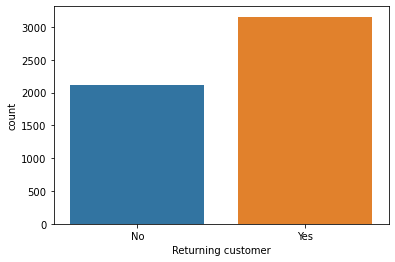

In [180]:
#visualize
sns.countplot(customers['Returning customer'])

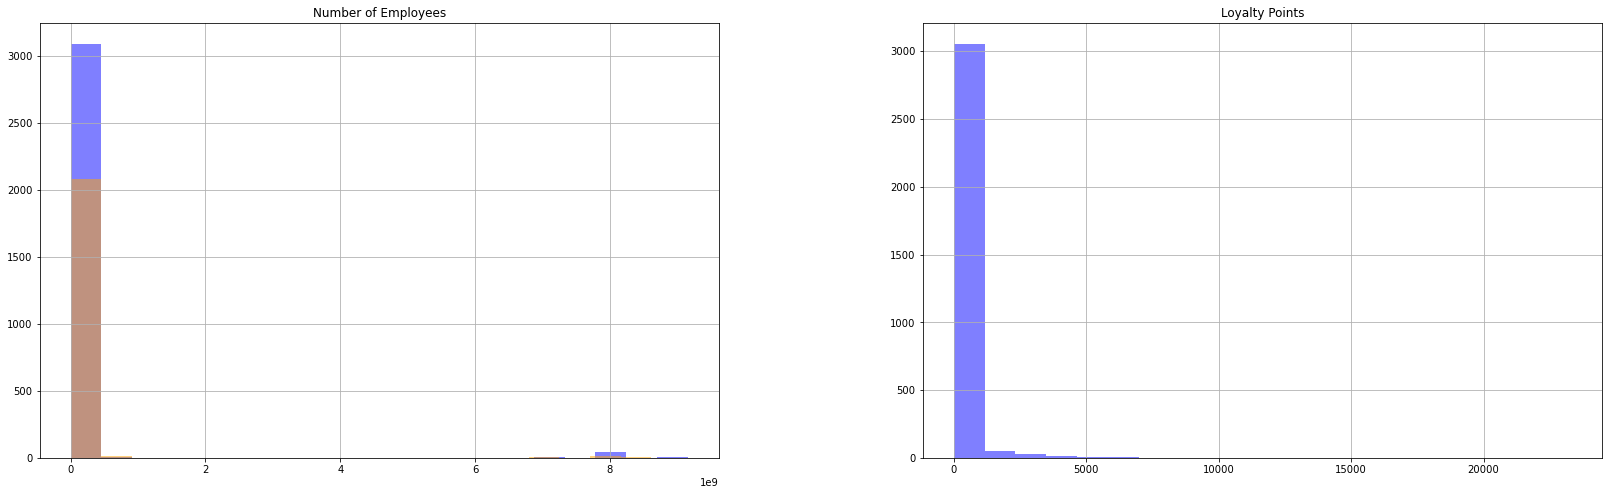

In [189]:
numerical = ['Number of Employees','Loyalty Points']
fig , ax = plt.subplots(1,2, figsize=(28,8))
customers[customers['Returning customer'] == 'Yes'][numerical].hist(bins=20, color="blue", alpha=0.5, ax=ax);
customers[customers['Returning customer'] == 'No'][numerical].hist(bins=20, color="orange", alpha=0.5, ax=ax);


<AxesSubplot:>

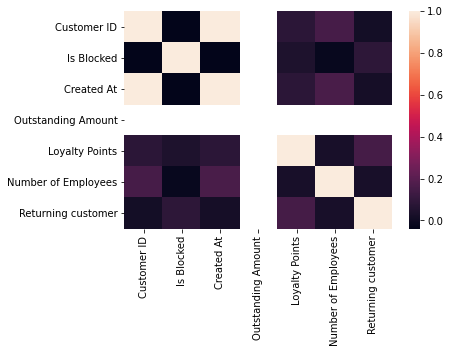

In [234]:
corr = customers.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [190]:
customers.dtypes

Customer ID              int64
Is Blocked               int64
Created At              object
Language                object
Outstanding Amount       int64
Loyalty Points           int64
Number of Employees    float64
Returning customer      object
dtype: object

In [191]:
#Convert created at column to date time
customers['Created At'] = pd.to_datetime(customers['Created At'])

In [201]:
#Convert all the non-numeric columns to numerical data types
customers['Returning customer'] = LabelEncoder().fit_transform(customers['Returning customer'])

In [207]:
customers.dtypes

Customer ID              int64
Is Blocked               int64
Created At               int64
Outstanding Amount       int64
Loyalty Points           int64
Number of Employees    float64
Returning customer       int32
dtype: object

In [206]:
customers['Created At'] = pd.to_numeric(pd.to_datetime(customers['Created At']))

## Customer retention  model 

In [209]:
#Scale the cleaned data
X = customers.drop('Returning customer', axis = 1) 
y = customers['Returning customer']

In [210]:
#Standardizing/scaling the features

X = StandardScaler().fit_transform(X)

In [214]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
#Create and train the baseline model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [216]:
predictions = model.predict(x_test)
print(predictions)

[1 0 1 ... 0 1 1]


In [217]:
#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.75      0.97      0.84       428
           1       0.98      0.77      0.86       627

    accuracy                           0.85      1055
   macro avg       0.86      0.87      0.85      1055
weighted avg       0.88      0.85      0.86      1055



In [230]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.50%


In [231]:
#Model 2
model2 = XGBClassifier()
model2.fit(x_train, y_train)

[13:43:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [232]:
y_pred = model2.predict(x_test)
predictions_ = [round(value) for value in y_pred]

In [233]:
accuracy = accuracy_score(y_test, predictions_)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [ ]:
#The dataset is optimally analysed using a less complex model like LogisticRegression.

## Customer segmentation

### Using the customer dataset and performing KMEANS Clustering to classify customers

In [262]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5272 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer ID          5272 non-null   int64  
 1   Is Blocked           5272 non-null   int64  
 2   Created At           5272 non-null   int64  
 3   Outstanding Amount   5272 non-null   int64  
 4   Loyalty Points       5272 non-null   int64  
 5   Number of Employees  5272 non-null   float64
 6   Returning customer   5272 non-null   int32  
dtypes: float64(1), int32(1), int64(5)
memory usage: 437.9 KB


In [263]:
X_values = customers.iloc[:,[3,4]].values

In [264]:
X_values

array([[ 0,  0],
       [ 0,  0],
       [ 0,  0],
       ...,
       [ 0, 42],
       [ 0,  0],
       [ 0,  0]], dtype=int64)

`Determining the value of K using Elbow method`

In [265]:
sum_squares = []

In [266]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=0)
    kmeans.fit(X_values)
    sum_squares.append(kmeans.inertia_)
    

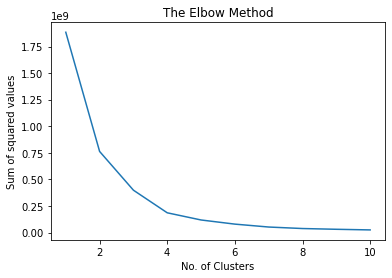

In [267]:
plt.plot(range(1,11),sum_squares)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Sum of squared values')
plt.show()

`From the diagram the optimal number of clusters is 4`

In [268]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=0)

In [269]:
y_kmeans = kmeans_model.fit_predict(X_values)

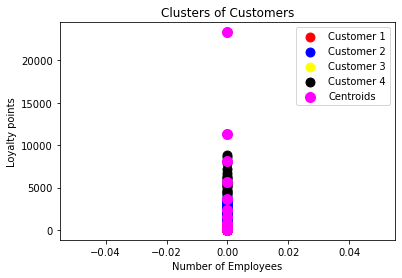

In [270]:
plt.scatter(X_values[y_kmeans == 0,0],X_values[y_kmeans == 0,1], s=80, c = 'red', label = 'Customer 1')
plt.scatter(X_values[y_kmeans == 1,0],X_values[y_kmeans == 1,1], s=80, c = 'blue', label = 'Customer 2')
plt.scatter(X_values[y_kmeans == 2,0],X_values[y_kmeans == 2,1], s=80, c = 'yellow', label = 'Customer 3')
plt.scatter(X_values[y_kmeans == 3,0],X_values[y_kmeans == 3,1], s=80, c = 'black', label = 'Customer 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c='magenta',label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Number of Employees')
plt.ylabel('Loyalty points')
plt.legend()
plt.show()

`Not enough data variations to properly cluster the customers`

## Orders Data Analysis

In [271]:
Orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13671 entries, 0 to 1428
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order ID                13671 non-null  int64  
 1   Order Status            13671 non-null  object 
 2   Category Name           13671 non-null  object 
 3   SKU                     13671 non-null  object 
 4   Quantity                13671 non-null  int64  
 5   Unit Price              13671 non-null  int64  
 6   Cost Price              13671 non-null  object 
 7   Total Cost Price        13671 non-null  object 
 8   Total Price             13671 non-null  int64  
 9   Order Total             13671 non-null  float64
 10  Sub Total               13671 non-null  int64  
 11  Remaining Balance       13671 non-null  int64  
 12  Payment Method          13671 non-null  object 
 13  Transaction ID          13671 non-null  int64  
 14  Currency Symbol         13671 non-null 

In [282]:
Orders['Customer ID'].nunique()

702

In [276]:
#Top orders
Number_of_orders = Orders.groupby('Category Name').agg({'Quantity':'sum'})

In [274]:
print(Number_of_orders)

                     Quantity
Category Name                
Beer & Bitters              3
Beverages                 494
Cleaning & Hygiene       2833
Cooking Fat & Oil        6504
Flour & Sugar           14051
Fruits & Vegetables      4045
Meat & Fish              1606
Noodles & Spaghetti       369
Packaging                1678
Rice & Cereals            971
Salt & Seasoning         3596
Spreads                   106
Vegetables                117
Wine                        2


In [280]:
Orders.head()

,Order ID,Order Status,Category Name,SKU,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,...,Currency Symbol,Customer ID,Merchant ID,Store Name,Distance (in km),Order Time,Pickup Time,Delivery Time,Order Preparation Time,Flat Discount
0,11265015,ORDERED,Cooking Fat & Oil,KKCO0487,1,4400,4250,4250,4400,4350.0,...,KSh,3755460,893555,Topup Mama,10.90,2022-02-17T16:36:27.000Z,2022-02-17T16:37:16.000Z,2022-02-18T08:00:00.000Z,0,0
1,11264651,ORDERED,Cleaning & Hygiene,KKPT280100,1,180,130,130,180,7255.0,...,KSh,4541187,893555,Topup Mama,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,0
2,11264651,ORDERED,Flour & Sugar,KKFS0702,6,263,247,1482,1578,7255.0,...,KSh,4541187,893555,Topup Mama,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,0
3,11264651,ORDERED,Salt & Seasoning,KKSS0002,10,65,58,580,650,7255.0,...,KSh,4541187,893555,Topup Mama,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,0
4,11264651,ORDERED,Beverages,KKBE0105,1,249,208.5,208.5,249,7255.0,...,KSh,4541187,893555,Topup Mama,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,0


In [279]:
Orders.columns

Index(['Order ID', 'Order Status', 'Category Name', 'SKU', 'Quantity',
       'Unit Price', 'Cost Price', 'Total Cost Price', 'Total Price',
       'Order Total', 'Sub Total', 'Remaining Balance', 'Payment Method',
       'Transaction ID', 'Currency Symbol', 'Customer ID', 'Merchant ID',
       'Store Name', 'Distance (in km)', 'Order Time', 'Pickup Time',
       'Delivery Time', 'Order Preparation Time', 'Flat Discount'],
      dtype='object')

In [ ]:
O = Number_of_orders.sum()
C = Orders['Customer ID'].nunique()

In [284]:
Number_of_orders.sum()

Quantity    36375
dtype: int64

In [295]:
customers.to_csv('customers.csv')
Orders.to_csv('orders.csv')
deliveries.to_csv('deliveries.csv')